In [1]:
# Import necessary libraries
import serial
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

In [2]:
# Serial port configuration
BAUD_RATE = 115200
SERIAL_PORT = '/dev/cu.usbserial-110'  # Replace with your Arduino's serial port


In [3]:
# Initialize serial port
try:
    ser = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
except serial.SerialException:
    print(f"Could not open serial port {SERIAL_PORT}.")
    exit()

Could not open serial port /dev/cu.usbserial-110.


In [4]:

# Data storage
desired_time_steps = 60
data = np.zeros((32, desired_time_steps))  # 32 frequency bins, 60 time steps
x = np.arange(desired_time_steps)  # Time steps
offset = 0
count = 5  # Offset down-counter
flag = False  # Only display each data point once


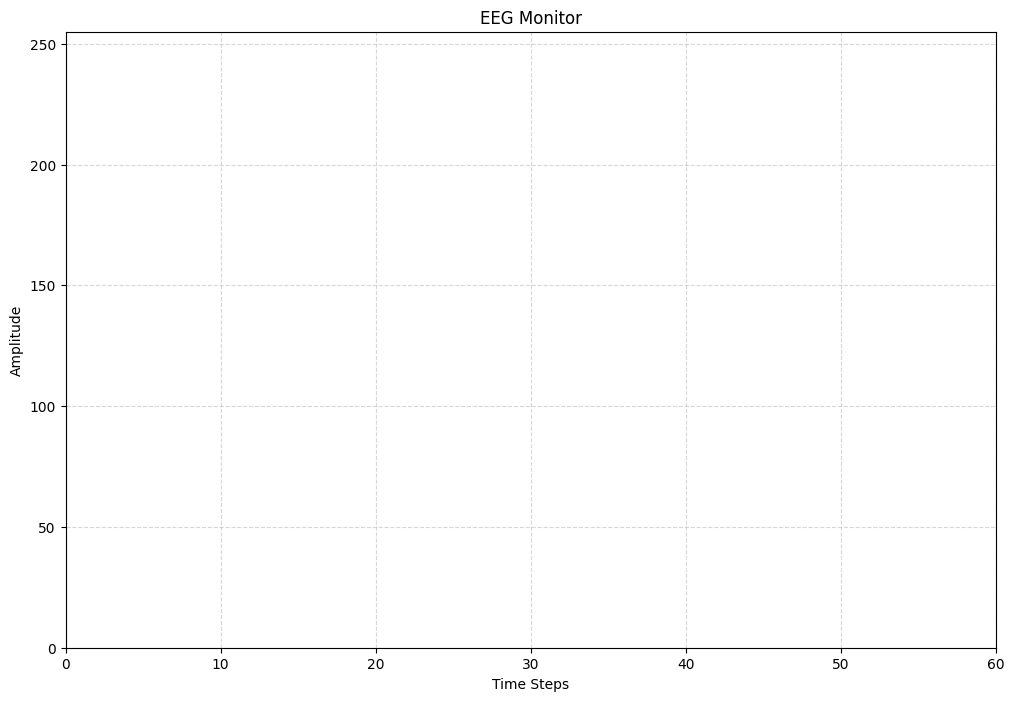

: 

In [5]:
# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))
lines = []
colors = ['white', 'red', 'orange', 'yellow', 'green']
color_map = [colors[i % len(colors)] for i in range(32)]

for i in range(32):
    line, = ax.plot([], [], color=color_map[i], linewidth=4)
    lines.append(line)

y_max = 255
y_min = 0

ax.set_xlim(0, desired_time_steps)
ax.set_ylim(y_min, y_max)
ax.set_xlabel('Time Steps')
ax.set_ylabel('Amplitude')
ax.set_title('EEG Monitor')
ax.grid(True, which='both', linestyle='--', alpha=0.5)


In [ ]:
# Label axes similar to your Processing code
ax.set_xticks(np.linspace(0, desired_time_steps, num=13))
ax.set_xticklabels([f"{int(t)}" for t in np.linspace(0, desired_time_steps, num=13)])
ax.set_yticks(np.linspace(y_min, y_max, num=17))
ax.set_yticklabels([f"{int(t)}" for t in np.linspace(y_min, y_max, num=17)])


In [2]:
# Update function for animation
def update(frame):
    global data, offset, count, flag
    try:
        line = ser.readline().decode('utf-8').strip()
        if line:
            values = line.split(',')
            if len(values) == 32:
                # Convert string values to floats
                values = [float(v) for v in values]
                if count > 0:
                    offset = values[0]
                    count -= 1
                values[0] -= offset  # Remove DC offset

                # Shift data left and append new values
                data = np.roll(data, -1, axis=1)
                data[:, -1] = values

                # Update each line
                for i, line_obj in enumerate(lines):
                    line_obj.set_data(x, data[i])
                flag = True
    except (ValueError, serial.SerialException):
        pass  # Ignore errors and continue

    if flag:
        return lines
    else:
        return []

In [ ]:
# Animation
ani = animation.FuncAnimation(fig, update, interval=1, blit=True)


In [ ]:
# Show the plot
plt.show()


In [ ]:
# Close the serial port when done
ser.close()